# Importing Required Libraries 

In [30]:
import requests,datetime,json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Api Setup

In [2]:
API_KEY = "8d9579bad99e253139a746fe370c2344"
location = "Tokyo,JP"
api_url = f"http://api.openweathermap.org/data/2.5/forecast?q={location}&appid={API_KEY}&units=metric"

# Interacting with OpenWeatherApi

In [3]:
response = requests.get(api_url)
weather_data = response.json()
weather_data['list'][0]['weather'][0]['description'] 
print(json.dumps(weather_data,indent=4))

{
    "cod": "200",
    "message": 0,
    "cnt": 40,
    "list": [
        {
            "dt": 1731132000,
            "main": {
                "temp": 17.07,
                "feels_like": 16.01,
                "temp_min": 17.07,
                "temp_max": 17.65,
                "pressure": 1027,
                "sea_level": 1027,
                "grnd_level": 1025,
                "humidity": 45,
                "temp_kf": -0.58
            },
            "weather": [
                {
                    "id": 803,
                    "main": "Clouds",
                    "description": "broken clouds",
                    "icon": "04d"
                }
            ],
            "clouds": {
                "all": 75
            },
            "wind": {
                "speed": 2.35,
                "deg": 54,
                "gust": 2.73
            },
            "visibility": 10000,
            "pop": 0,
            "sys": {
                "pod": "d"
            },
          

# Extracting relevant weather attributes : Temperature, humidity, wind speed, precipitation, description and Timestamp

In [4]:
Temperature = [data['main']['temp'] for data in weather_data['list']]
Humidity = [data['main']['humidity'] for data in weather_data['list']]
Description = [data['weather'][0]['description'] for data in weather_data['list']]
wind_speed = [data['wind']['speed'] for data in weather_data['list']]
timestamps = [data['dt'] for data in weather_data['list']]
Pressure = [data['main']['pressure'] for data in weather_data['list']]


# Making DataFrame, Cleaning : Handing missing values if any

In [5]:
date = pd.to_datetime(timestamps, unit='s')

In [6]:
weather_df = pd.DataFrame(
    {
        "Dates" : date,
        "Temperature" : Temperature,
        "Humidity" : Humidity,
        "wind_speed" : wind_speed,
        "Pressure" : Pressure,
        "Description" : Description
    }
)

In [7]:
weather_df

,Dates,Temperature,Humidity,wind_speed,Pressure,Description
0,2024-11-09 06:00:00,17.07,45,2.35,1027,broken clouds
1,2024-11-09 09:00:00,17.04,46,5.28,1027,broken clouds
2,2024-11-09 12:00:00,16.04,50,3.90,1028,broken clouds
3,2024-11-09 15:00:00,15.38,55,3.75,1028,overcast clouds
4,2024-11-09 18:00:00,14.65,51,4.74,1027,overcast clouds
5,2024-11-09 21:00:00,14.11,44,5.83,1028,overcast clouds
6,2024-11-10 00:00:00,13.53,51,4.98,1027,light rain
7,2024-11-10 03:00:00,12.42,64,4.91,1025,light rain
8,2024-11-10 06:00:00,13.91,67,4.50,1024,overcast clouds
9,2024-11-10 09:00:00,14.05,72,3.84,1023,light rain


In [8]:
weather_df.isnull().sum()

Dates          0
Temperature    0
Humidity       0
wind_speed     0
Pressure       0
Description    0
dtype: int64

# Perform Data Modeling to Analyze weather patttern, such as average temperature, Maximum temperature, Minimum temperature

In [9]:
avg_temperature = weather_df['Temperature'].mean()
min_temperature = weather_df['Temperature'].min()
max_temperature = weather_df['Temperature'].max()
print("+----- Weather Pattern -------+")
print(f"| Average Temperature : {avg_temperature:.2f} |")
print(f"| Minimum Temperature : {min_temperature} |")
print(f"| Maximum Temperature : {max_temperature} |")
print("+-----------------------------+")

+----- Weather Pattern -------+
| Average Temperature : 16.46 |
| Minimum Temperature : 12.42 |
| Maximum Temperature : 20.75 |
+-----------------------------+


# Data Aggregation techniques to summarize weather statistics by specific time periods 
+ Daily
+ Monthly
+ Seasonal

In [10]:
weather_df.set_index('Dates', inplace=True)

In [17]:
temperature_daily = weather_df['Temperature'].resample('D').mean()
temperature_Montly = weather_df['Temperature'].resample('ME').mean()
temperature_Seasonal = weather_df['Temperature'].resample('QE').mean()

In [18]:
print("+------- Data Aggregation : Temperature [Daily]  ------------+")
print(temperature_daily)
print("\n+------- Data Aggregation : Temperature [Monthly]  ------------+")
print(temperature_Montly)
print("\n+------- Data Aggregation : Temperature [Seasonal]  ------------+")
print(temperature_Seasonal)


+------- Data Aggregation : Temperature [Daily]  ------------+
Dates
2024-11-09    15.71500
2024-11-10    14.25125
2024-11-11    17.63875
2024-11-12    17.36250
2024-11-13    17.26250
2024-11-14    16.03000
Freq: D, Name: Temperature, dtype: float64

+------- Data Aggregation : Temperature [Monthly]  ------------+
Dates
2024-11-30    16.46175
Freq: ME, Name: Temperature, dtype: float64

+------- Data Aggregation : Temperature [Seasonal]  ------------+
Dates
2024-12-31    16.46175
Freq: QE-DEC, Name: Temperature, dtype: float64


# Visualize the Weather Data - Mean of daily Temperature

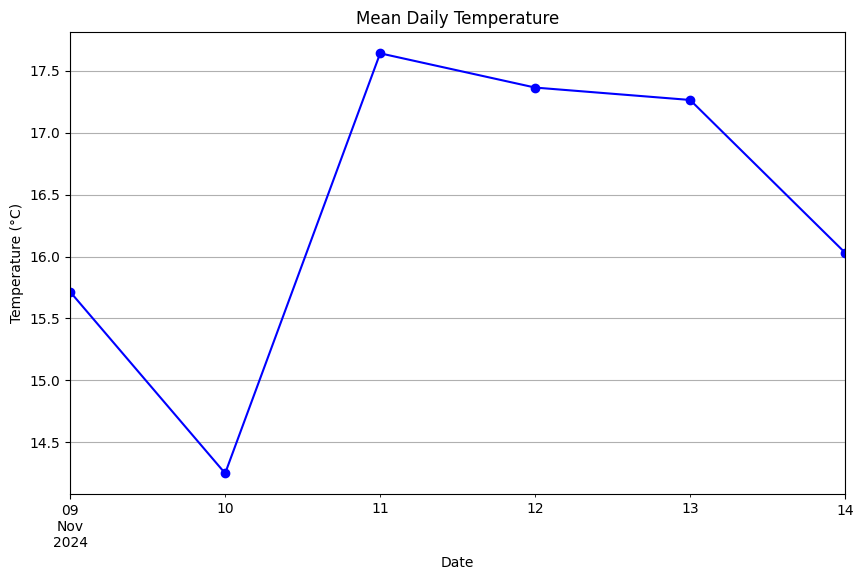

In [20]:
plt.figure(figsize=(10, 6))
temperature_daily.plot(color='Blue', linestyle='-', marker='o')                    
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Visualize the Weather Data - Mean of daily Humidity

In [24]:
humidity_daily = weather_df['Humidity'].resample('D').mean()

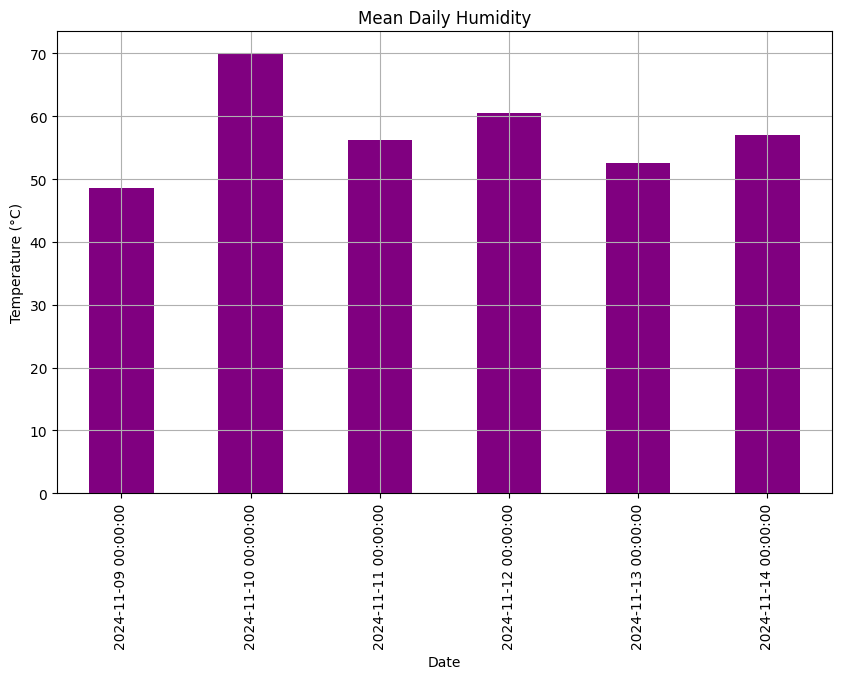

In [61]:
plt.figure(figsize=(10, 6))
humidity_daily.plot(color='purple', kind='bar')                    
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Visualize Relationship between weather attributes 

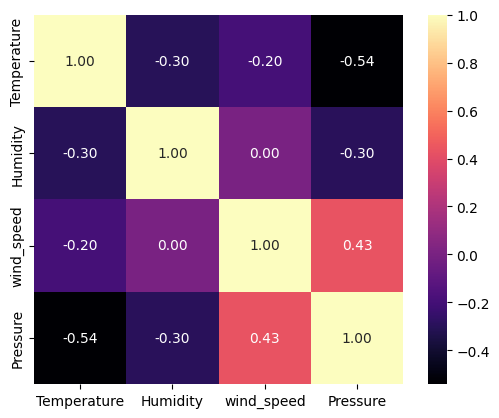

<Figure size 1000x500 with 0 Axes>

In [56]:
correlation_matrix = weather_df[['Temperature','Humidity','wind_speed','Pressure']].corr()
sns.heatmap(correlation_matrix,fmt='.2f',annot=True,cmap='magma',square=True)
plt.figure(figsize=(10,5))
plt.show()

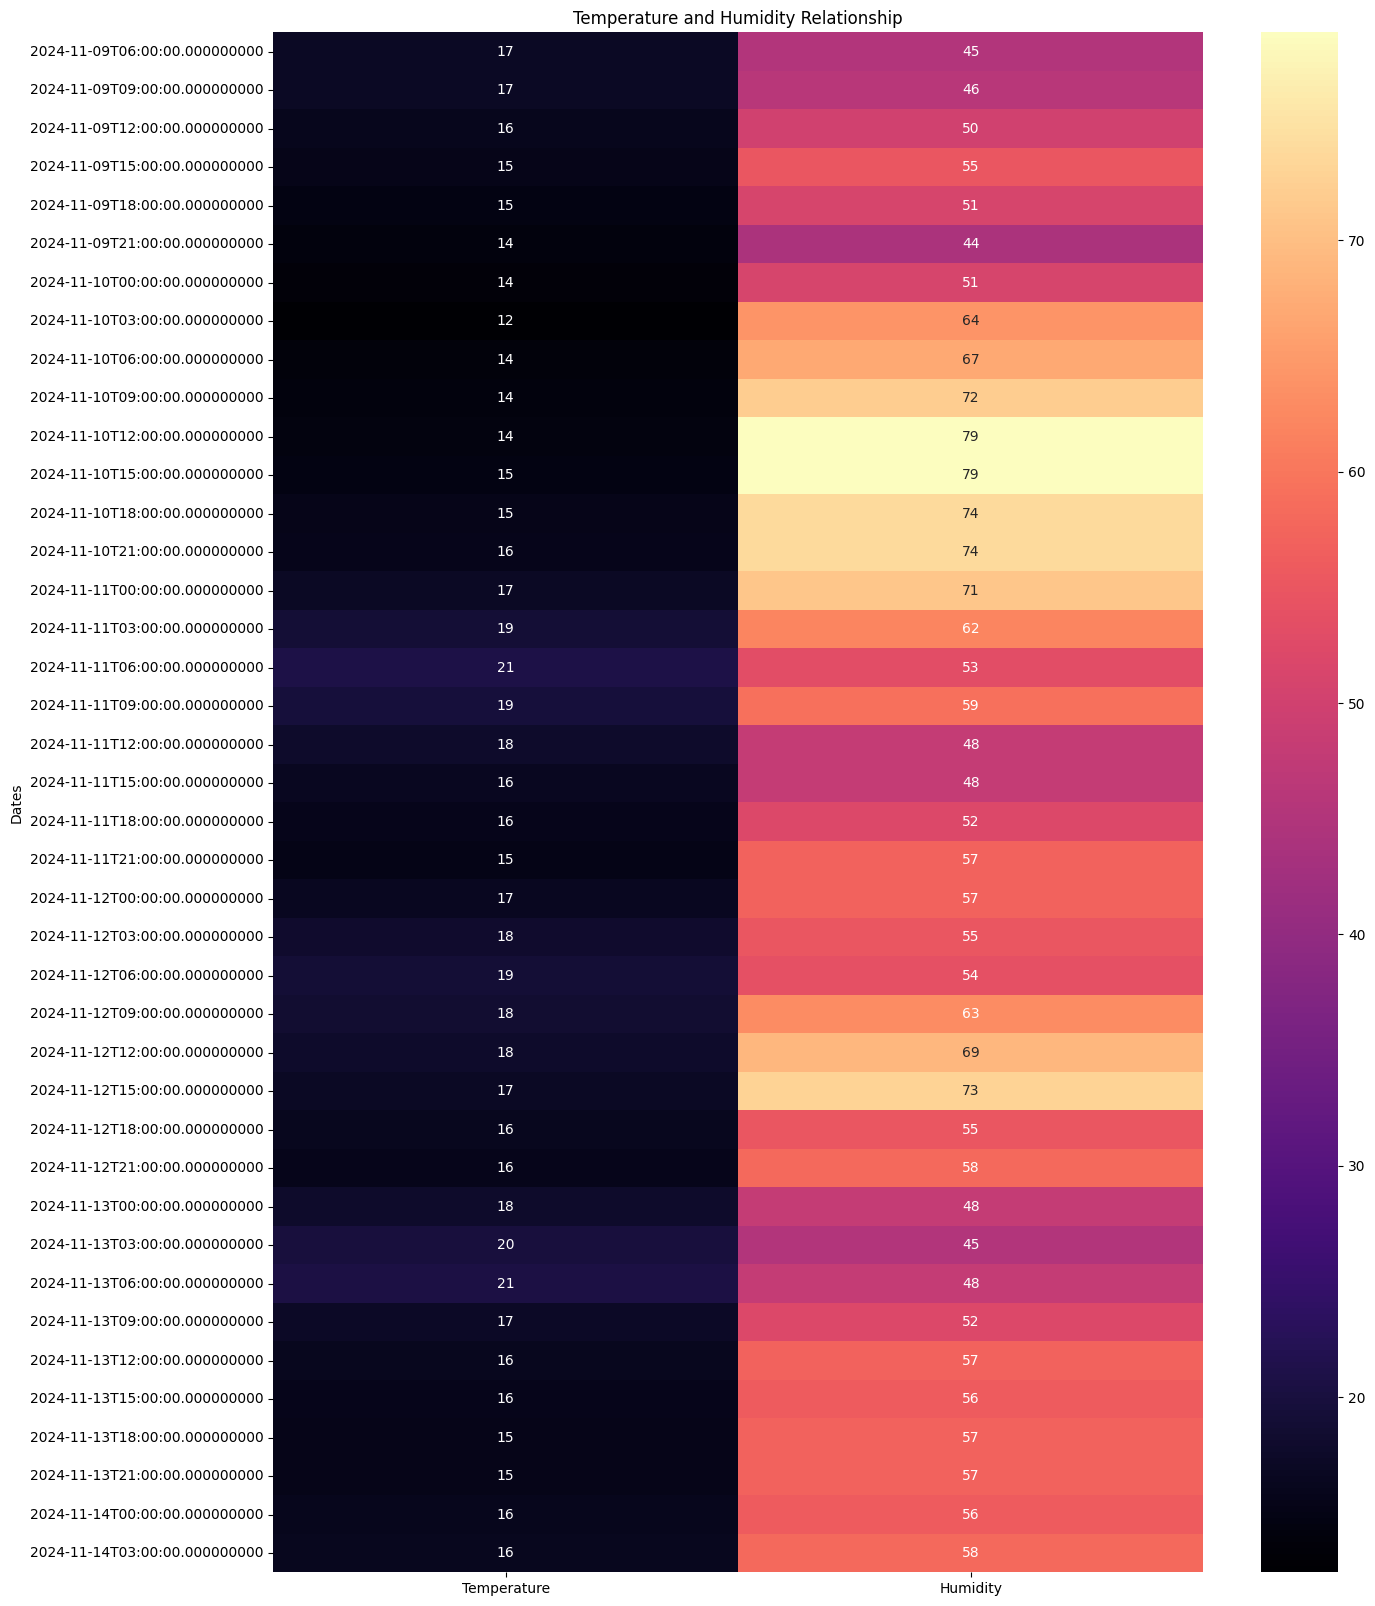

In [52]:
data_compare = weather_df[['Temperature','Humidity']]
plt.figure(figsize=(15,20))
plt.title("Temperature and Humidity Relationship")
sns.heatmap(data_compare,cmap='magma',annot=True)
plt.show()

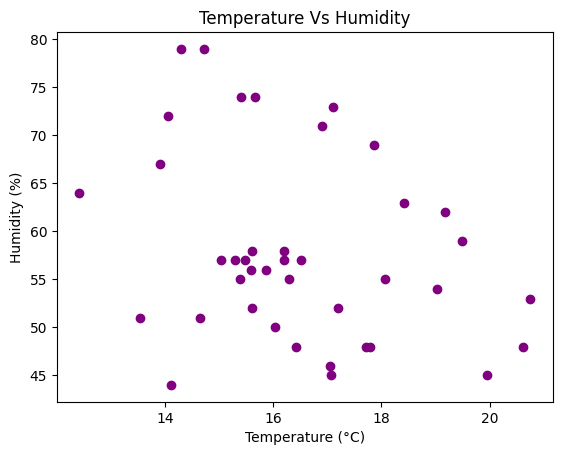

In [60]:
plt.scatter(weather_df['Temperature'], weather_df['Humidity'],color="purple")
plt.title("Temperature Vs Humidity")
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.show()